In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
df=pd.read_csv('dataset/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radius_mean'>

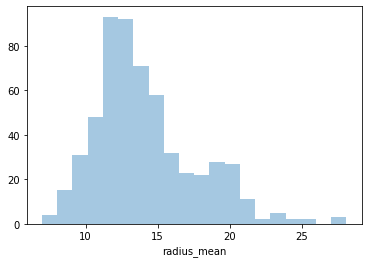

In [2]:
sns.distplot(df['radius_mean'], norm_hist=False,kde=False,bins=20)

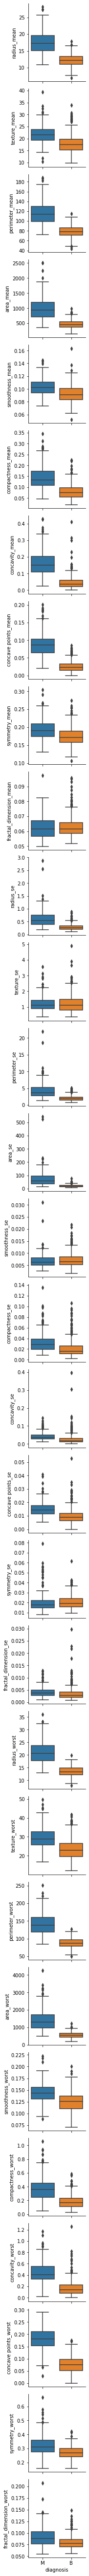

In [15]:
 #for i in df.iloc[:,2:].columns:
      #sns.boxplot(x='diagnosis',y=i,data=df)
g=sns.PairGrid(df.iloc[:,1:32], x_vars=["diagnosis"])
g.map(sns.boxplot)
    


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scl= StandardScaler()
# x_train,x_test,y_train,y_split = train_test_split(df.iloc[:,2:32],df['diagnosis'],test_size=0.1)
X=df.iloc[:,2:32]
y=df['diagnosis']
#X=scl.fit_transform(X)

In [4]:
fs_fclassif = SelectKBest(score_func=f_classif, k=4)
# apply feature selection
X_selected = fs_fclassif.fit(X,y)
fclassif_scores= pd.DataFrame([X.columns,X_selected.scores_])
fclassif_scores = fclassif_scores.transpose()
fclassif_scores.columns=['spec','score']
fclassif_scores.sort_values(by='score',ascending=False)

,spec,score
27,concave points_worst,964.385393
22,perimeter_worst,897.944219
7,concave points_mean,861.676020
20,radius_worst,860.781707
2,perimeter_mean,697.235272
23,area_worst,661.600206
0,radius_mean,646.981021
3,area_mean,573.060747
6,concavity_mean,533.793126
26,concavity_worst,436.691939


In [5]:
fs_chi = SelectKBest(score_func=chi2, k=4)
# apply feature selection
X_selected = fs_chi.fit(X,y)
fschi_scores= pd.DataFrame([X.columns,X_selected.scores_])
fschi_scores = fschi_scores.transpose()
fschi_scores.columns=['spec','score']
fschi_scores.sort_values(by='score',ascending=False)

,spec,score
23,area_worst,112598.431564
3,area_mean,53991.655924
13,area_se,8758.504705
22,perimeter_worst,3665.035416
2,perimeter_mean,2011.102864
20,radius_worst,491.689157
0,radius_mean,266.104917
12,perimeter_se,250.571896
21,texture_worst,174.449400
1,texture_mean,93.897508


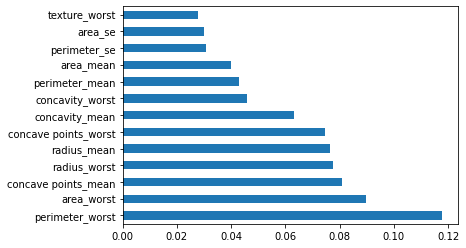

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
scl=StandardScaler()
X_sc=scl.fit_transform(X)
model = ExtraTreesClassifier()
model.fit(X_sc,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

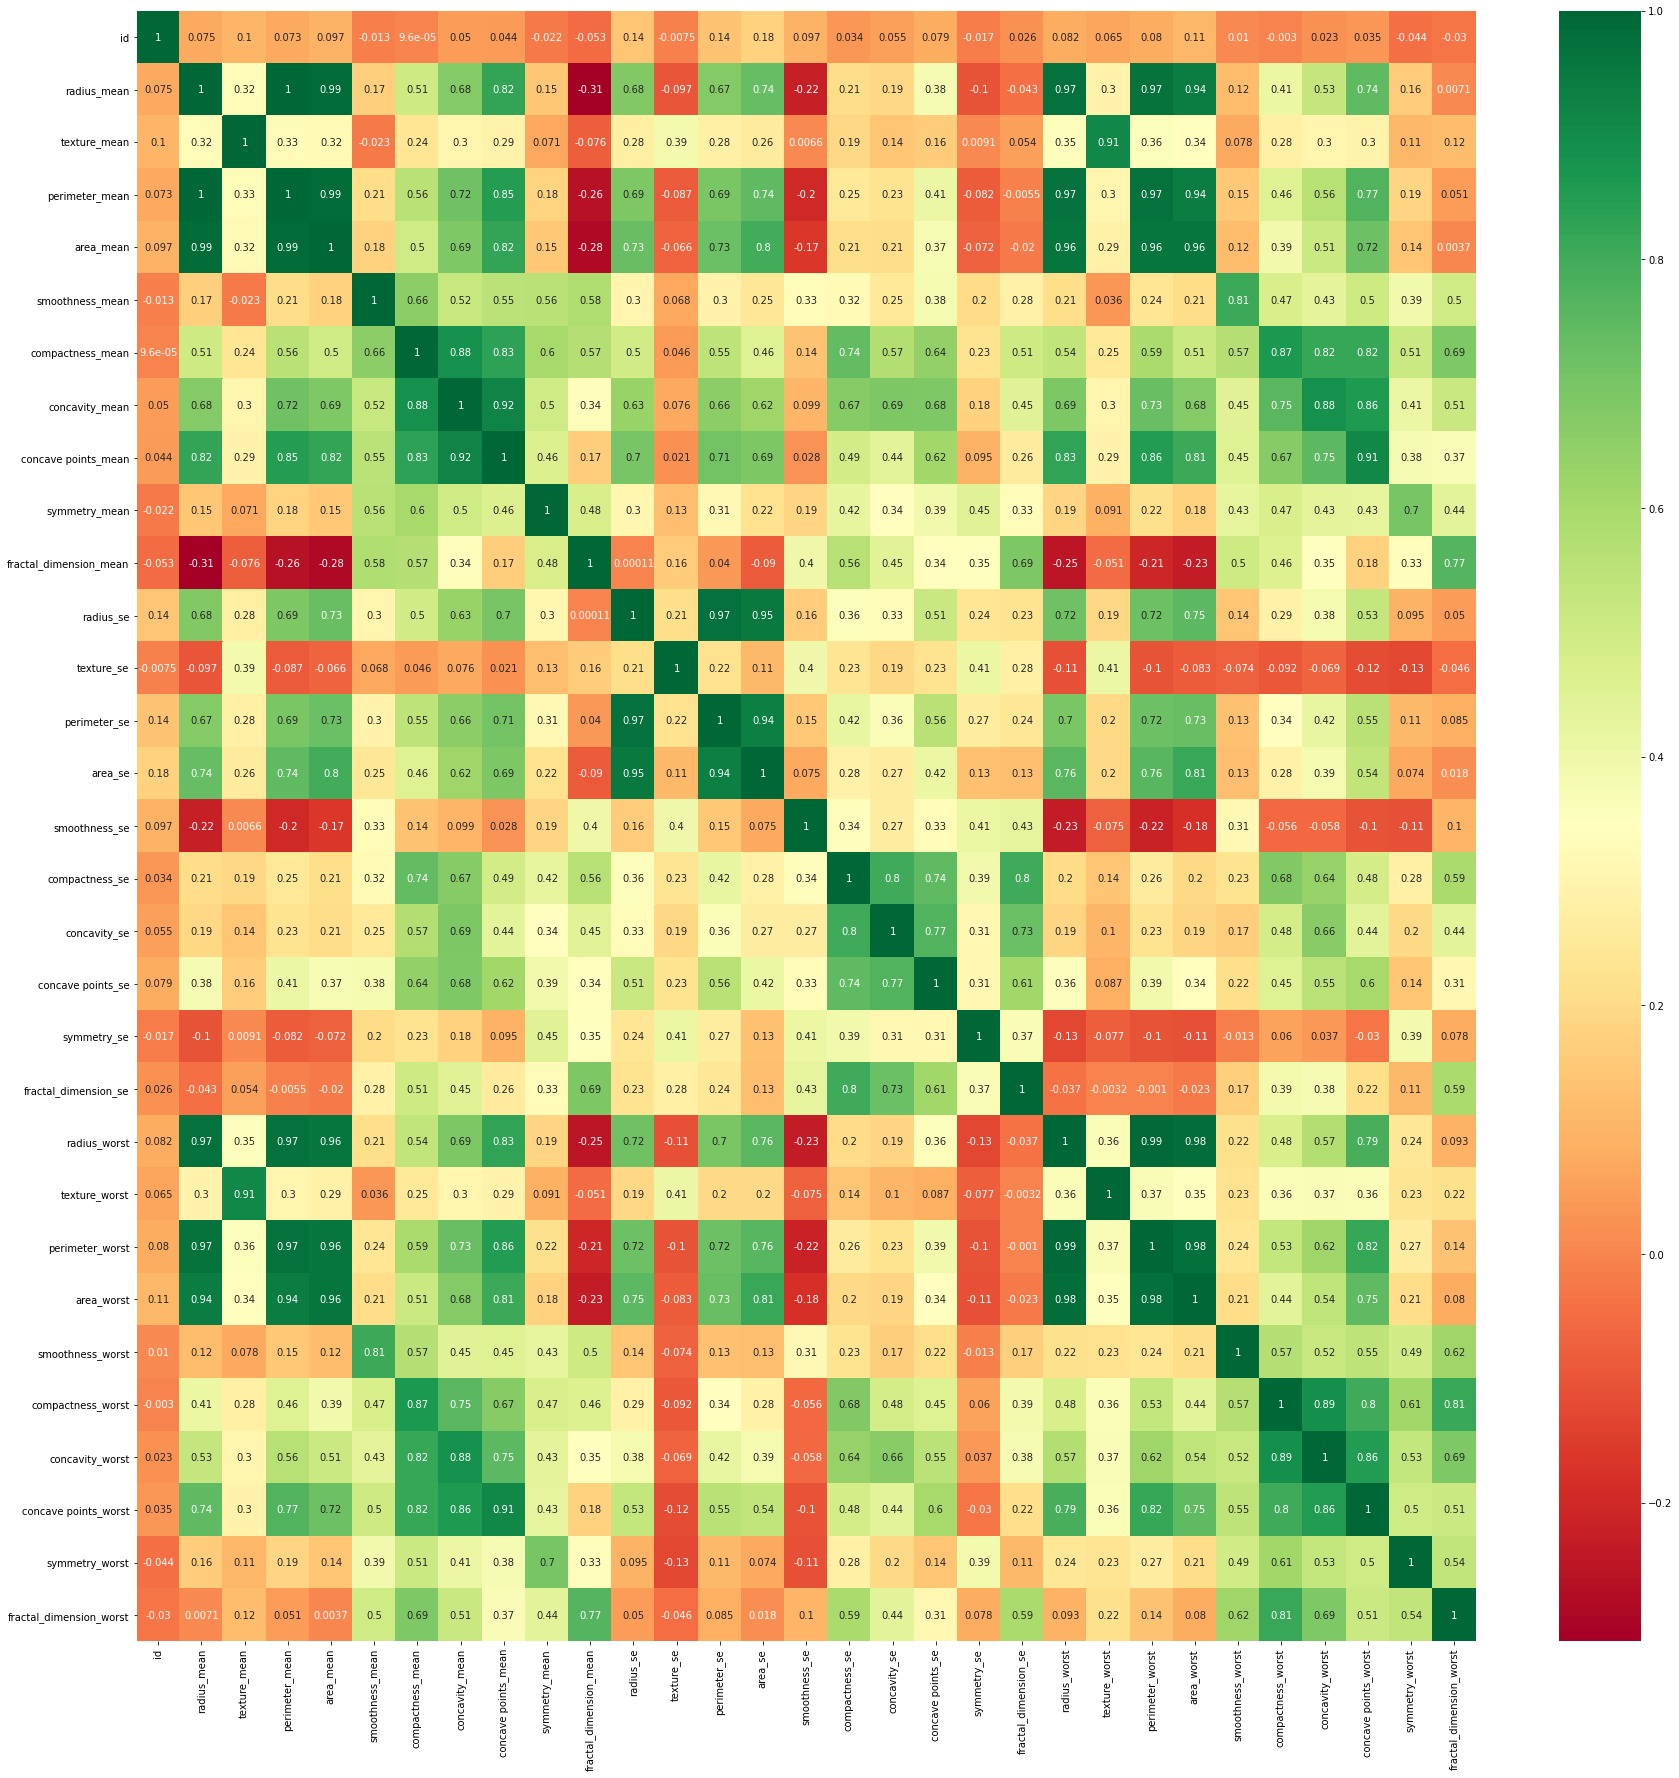

In [25]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
df_filtered=df[['radius_worst','perimeter_worst','concave points_worst','area_worst','concave points_mean']]

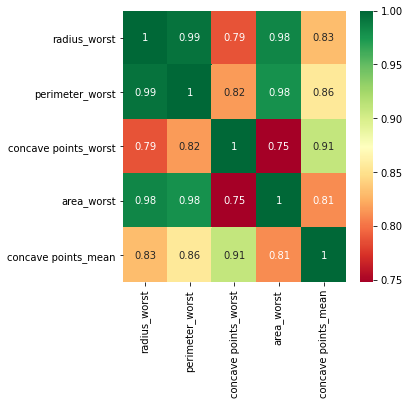

In [8]:
corrmat = df_filtered.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(df_filtered[top_corr_features].corr(),annot=True,cmap="RdYlGn")

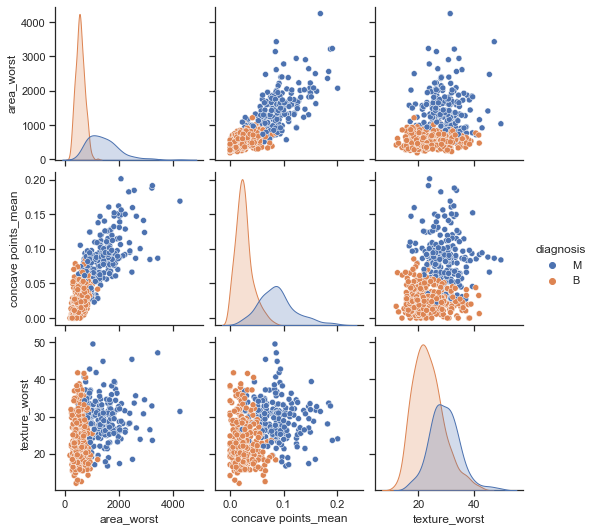

In [9]:
X_selected=X[['area_worst','concave points_worst','texture_worst']]
scl=StandardScaler()
X_selected=scl.fit_transform(X_selected)
x_train,x_test,y_train,y_test = train_test_split(X_selected,df['diagnosis'],test_size=0.3,random_state=2)
sns.set_theme(style="ticks")
sns.pairplot(df[['area_worst','concave points_mean','texture_worst','diagnosis']],hue="diagnosis")

In [10]:
#Model selection using Cross Validation
models=[('Log Reg',LogisticRegression(solver='liblinear',multi_class='ovr')),('Dec Tree',DecisionTreeClassifier()),('LDA',LinearDiscriminantAnalysis()),('KNN',KNeighborsClassifier(n_neighbors=7)),('SVM',LinearSVC(fit_intercept=True,dual=False,max_iter=2000)),('GNB',GaussianNB())]
results=[]
names=[]
kfold = StratifiedKFold(n_splits=10,random_state=5,shuffle=True)
for name,model in models:
    results.append(cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy'))
    names.append(name)
    print("Running : ",name)


Running :  Log Reg
Running :  Dec Tree
Running :  LDA
Running :  KNN
Running :  SVM
Running :  GNB


In [11]:
for i in range(6):
    print(names[i]," ",results[i].mean()," ",results[i].std())

Log Reg   0.9622435897435897   0.03597798883308199
Dec Tree   0.9496794871794872   0.029967177420487105
LDA   0.9546794871794871   0.022388319516124498
KNN   0.9747435897435898   0.022794208406602515
SVM   0.9723076923076922   0.028493283289863648
GNB   0.9698076923076924   0.018832303475010314


In [12]:
knn_cl=KNeighborsClassifier(n_neighbors=7)
knn_cl.fit(x_train,y_train)
pred=knn_cl.predict(x_test)


In [13]:
accuracy_score(y_test,pred)

0.9590643274853801

In [14]:
confusion_matrix(y_test,pred)

array([[101,   3],
       [  4,  63]], dtype=int64)

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       104
           M       0.95      0.94      0.95        67

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [16]:
gnb_cl=GaussianNB()
gnb_cl.fit(x_train,y_train)
gnb_cl.score(x_test,y_test)

0.9649122807017544

In [17]:
pred=gnb_cl.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97       104
           M       0.96      0.96      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [21]:
import numpy as np
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9,num=200)} 

In [22]:
gnb_clf = GridSearchCV(estimator=gnb_cl, 
                 param_grid=params_NB, 
                 cv=10,
                 n_jobs=-1,
                 error_score=0,
                 verbose=1, 
                 scoring='accuracy') 

In [23]:
gnb_clf_best=gnb_clf.fit(x_train,y_train.values.ravel())


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [24]:
gnb_clf_best.best_estimator_

GaussianNB(var_smoothing=0.007488103857590023)

In [25]:
gnb_y_pred=gnb_clf_best.predict(x_test)

In [26]:
gnb_clf_best.score(x_train,y_train)


0.9698492462311558

In [27]:
gnb_clf_best.score(x_test,y_test)

0.9649122807017544

In [28]:
print(confusion_matrix(y_test,gnb_y_pred))

[[101   3]
 [  3  64]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gnb_y_pred))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97       104
           M       0.96      0.96      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [30]:
params_KN = {'n_neighbors': range(3,11),
             'weights': ['uniform','distance']} 

In [33]:
knn_cl= KNeighborsClassifier()
knn_clf = GridSearchCV(estimator=knn_cl, 
                 param_grid=params_KN, 
                 cv=10,
                 n_jobs=-1,
                 error_score=0,
                 verbose=1, 
                 scoring='accuracy') 
knn_clf_best=knn_clf.fit(x_train,y_train.values.ravel())

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [34]:
knn_clf_best.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn_y_pred=knn_clf_best.predict(x_test)

In [36]:
knn_clf_best.score(x_train,y_train)

0.9849246231155779

In [37]:
knn_clf_best.score(x_test,y_test)

0.9649122807017544

In [38]:
print(confusion_matrix(y_test,knn_y_pred))

[[101   3]
 [  3  64]]


In [39]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97       104
           M       0.96      0.96      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

